# Ideia do mini projeto:
Implementar o algoritmo de tomada de decisão chamado TOPSIS

- O projeto deve receber como entrada uma matriz com alternativas e critérios
    - Ler de um arquivo .csv usando NumPy
- Deve retornar um ranking de quais alternativas são as melhores


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_csv_file(file_path):
    # Lê o arquivo CSV usando NumPy e converte para uma matriz
    data = np.genfromtxt(file_path, delimiter=',', skip_header=0, dtype=None, encoding='utf-8')
    return data

In [4]:
def topsis(matrix, cost_ben, weights):
    # Normalize the matrix (exmaple of use of broadcasting)
    norm_matrix = matrix / np.sqrt(np.sum(matrix**2, axis=0))

    # Apply cost-benefit analysis
    for i, cb in enumerate(cost_ben):
        if cb == 'c':  # Se o critério for um custo, inverte o sinal da coluna
            norm_matrix[:, i] = -norm_matrix[:, i]

    # Calculate the weighted normalized matrix
    weighted_matrix = norm_matrix * weights

    # Calculate the positive and negative ideal solutions
    ideal_positive = np.max(weighted_matrix, axis=0)
    ideal_negative = np.min(weighted_matrix, axis=0)

    # Calculate the distance to the ideal solutions
    distance_positive = np.sqrt(np.sum((weighted_matrix - ideal_positive)**2, axis=1))
    distance_negative = np.sqrt(np.sum((weighted_matrix - ideal_negative)**2, axis=1))

    # Calculate the similarity
    ranking = distance_negative / (distance_positive + distance_negative)

    # print("matrix\n", matrix)
    # print("\nnorm_matrix\n",norm_matrix)
    # print("\nweighted_matrix\n",weighted_matrix)
    # print("\nideal_positive\n", ideal_positive)
    # print("\nideal_negative\n",ideal_negative)
    # print("\ndistance_positive\n",distance_positive)
    # print("\ndistance_negative\n",distance_negative)
    # print("\nranking\n",ranking)

    return ranking

In [5]:
file_path = 'cars.csv'
data = read_csv_file(file_path)
alternatives = data[1:, 0]
criteria = data[0, 1:]
values_matrix = data[1:, 1:].astype(float)

# print(alternatives)
# print(criteria)
# print(values_matrix)

# Pesos dos critérios
weights = np.array([0.30, 0.05, 0.60, 0.05])
cost_ben = np.array(["c", "b", "c", "b"])


# Obter o ranking das alternativas usando o algoritmo TOPSIS
ranking = topsis(values_matrix, cost_ben, weights)
print(f"Ranking: {ranking}")

Ranking: [0.78562925 0.66099579 0.21437075]


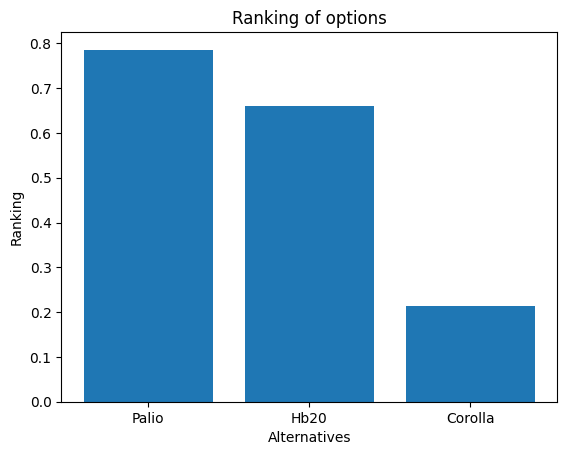

In [6]:
# Criar um gráfico de barras vertical para mostrar o ranking
plt.bar(np.arange(len(ranking)), ranking)
plt.xlabel('Alternatives')
plt.ylabel('Ranking')
plt.title('Ranking of options')
plt.xticks(np.arange(len(ranking)), alternatives)
plt.show()

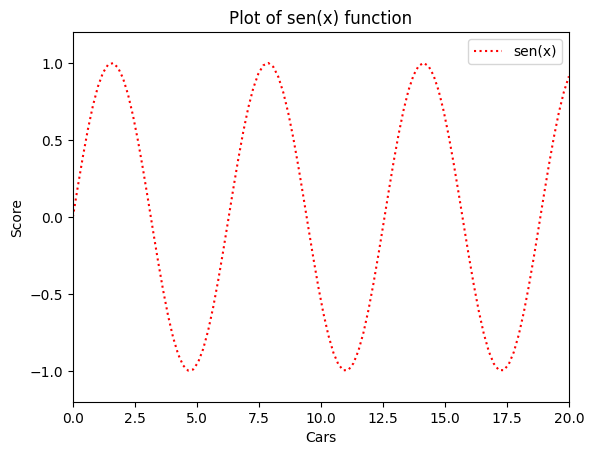

In [42]:
fig, ax = plt.subplots()

# ax.axes.set_ylim(bottom=-1.2, top=1.2)
# ax.axes.set_xlim((0,20))
# ax.set_title('Ranking of best score based on TOPSIS')
# ax.set_xlabel('Cars')
# ax.set_ylabel('Score')

# OU:

ax.set(
    xlim=(0,20),
    ylim=(-1.2, 1.2),
    xlabel='Cars',
    ylabel='Score',
    title='Plot of sen(x) function'
)

x = np.linspace(0, 20, 100)
ax.plot(x, np.sin(x), color=(1,0,0), linestyle=':')
# fig.savefig('sen(x)', dpi=100)

# plt.show()
ax.legend(labels=['sen(x)'])


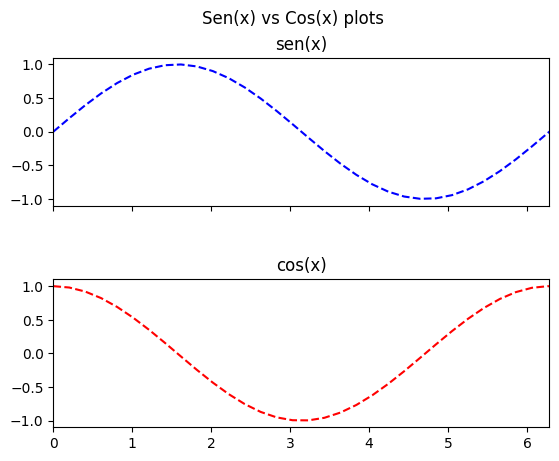

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.suptitle("Sen(x) vs Cos(x) plots")
fig.subplots_adjust(hspace=0.5)
ax[0].set(
    xlim=(0,2*np.pi),
    title='sen(x)'
)
ax[1].set(
    xlim=(0,2*np.pi),
    title='cos(x)'    
)
ax[0].plot(x, np.sin(x), '--b')
ax[1].plot(x, np.cos(x), '--r')